<a href="https://colab.research.google.com/github/Jeetesh-KumarM/CAPSTONE-PROJECT-3-CLASSIFICATION/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Coronavirus Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [197]:
# Import Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
# Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

### Dataset Loading

In [198]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Coronavirus Tweet Sentiment Analysis/Coronavirus Tweets.csv',encoding='latin-1')

### Dataset First View

In [200]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [201]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [202]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [203]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [204]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Axes(0.125,0.125;0.698618x0.755)


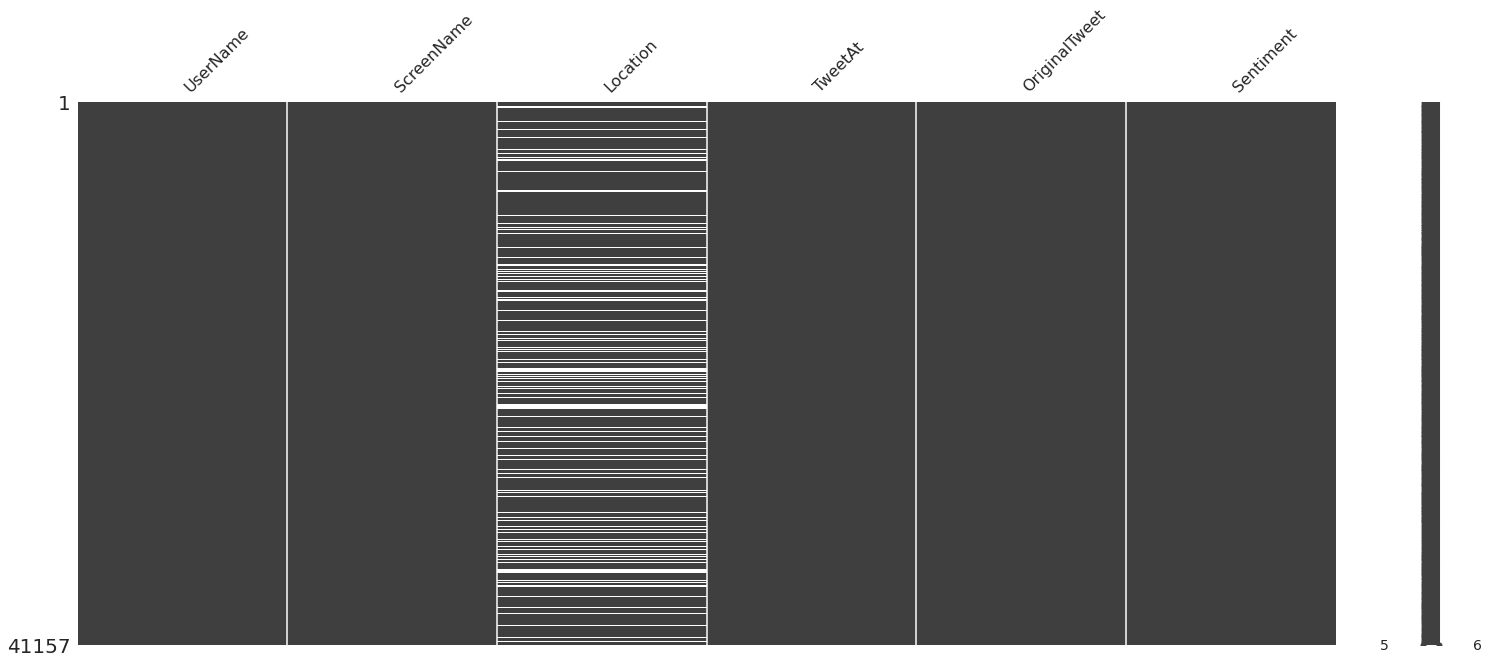

In [205]:
# Visualizing the missing values
import missingno as msno
print(msno.matrix(df))

Axes(0.125,0.125;0.775x0.755)


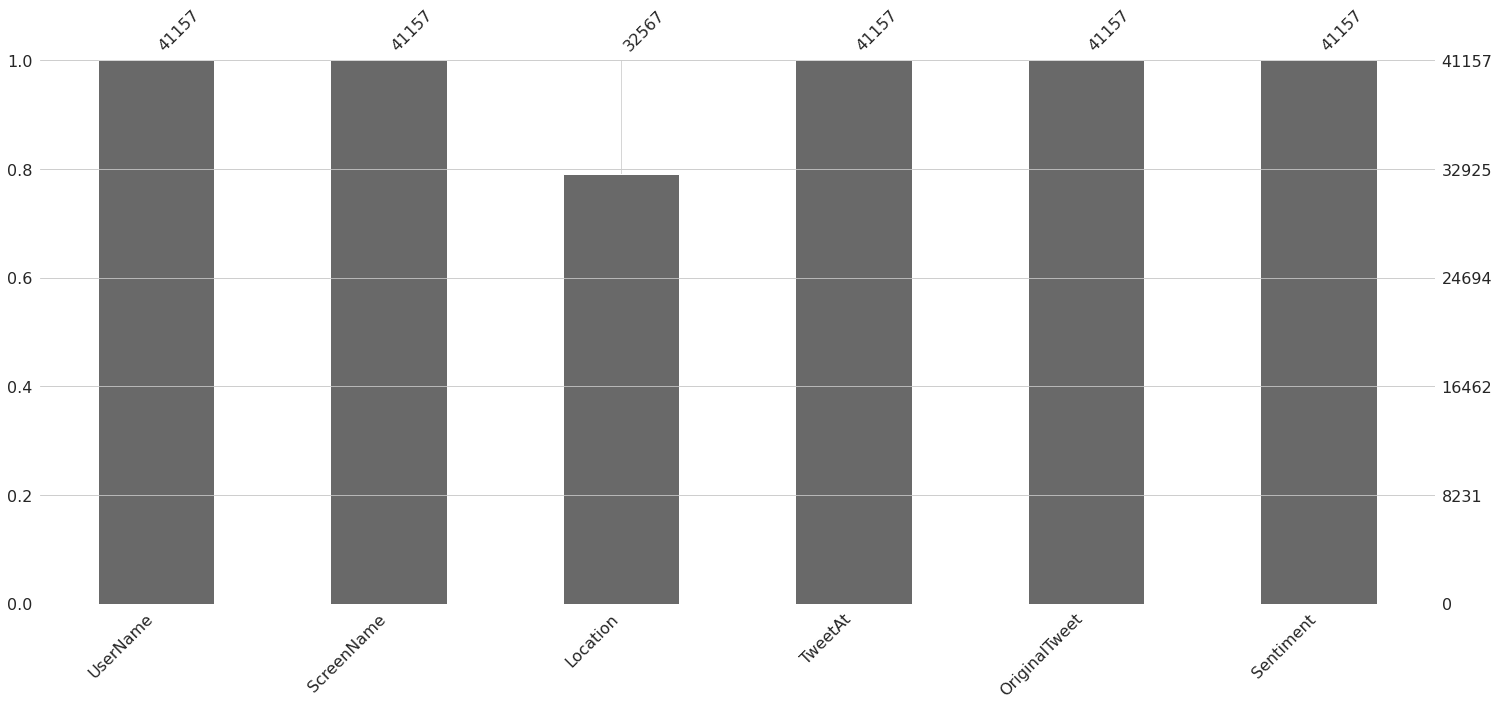

In [206]:
print(msno.bar(df))

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [207]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [208]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,41157.0,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [209]:
# Check Unique Values for each variable.
for i in list(df.columns):
  print(i)
  print(df[i].unique())
  print('length:',len(df[i].unique()))
  print('-'*50)

UserName
[ 3799  3800  3801 ... 44953 44954 44955]
length: 41157
--------------------------------------------------
ScreenName
[48751 48752 48753 ... 89905 89906 89907]
length: 41157
--------------------------------------------------
Location
['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']
length: 12221
--------------------------------------------------
TweetAt
['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']
length: 30
--------------------------------------------------
OriginalTweet
['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advi

## 3. ***Data Wrangling***

### Data Wrangling Code

In [210]:
# Write your code to make your dataset analysis ready.
df1=df.copy()
df1.isnull().sum()/len(df)*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

Location had 20.8 % null values so those rows has been dropped.

In [211]:
df1.dropna(inplace=True)
df1 = df1.reset_index()

In [212]:
df1.shape

(32567, 7)

Original dataset had 41157 columns now it has 32567 columns after dropping the null values.

In [213]:
#Extracting Day and Month fron TweetAt
#df1['TweetAt'] = pd.to_datetime(df['TweetAt'])
df1['Day']=pd.DatetimeIndex(df1['TweetAt']).day
df1['Month']=pd.DatetimeIndex(df1['TweetAt']).month

In [214]:
#Converting the string into lowercase
df1['Location']=df1['Location'].str.lower()
df1['OriginalTweet']=df1['OriginalTweet'].str.lower()

### What all manipulations have you done and insights you found?

1. Location column had around 21% of null values So those values has been dropped.
2. Created Day and Month as new column from TweetAt column which will provide information regarding the busiest day and month.Since the data present is of a particular year(2020) so year column hasn't been created.
3. Converted Location and OriginalTweet column to lower case to avoid case sensitivity.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Location

In [215]:
loc=df1['Location'].value_counts().sort_values(ascending=False)[:10]

<Axes: xlabel='Location', ylabel='count'>

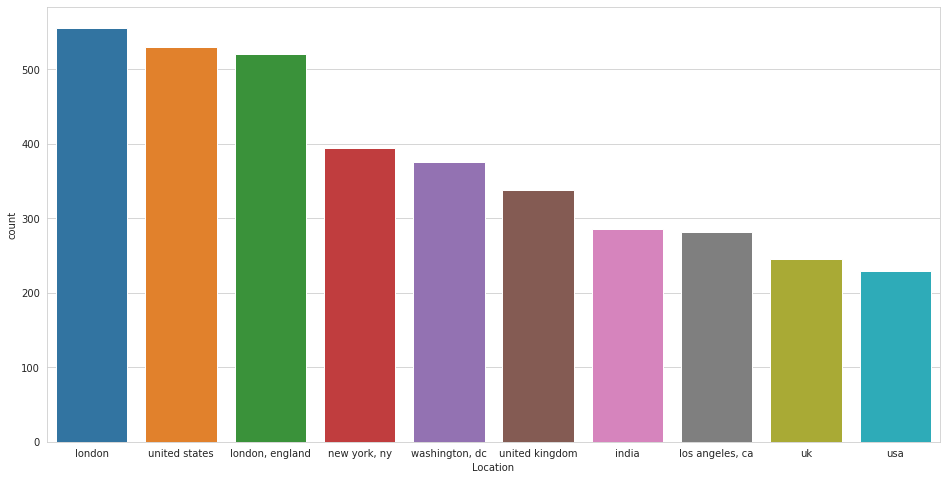

In [216]:
# Chart - 1 visualization code
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.countplot(x='Location',data=df1[df1['Location'].isin(loc.index)],order=loc.index)

##### 1. Why did you pick the specific chart?

To check which location has the highest number of users.

##### 2. What is/are the insight(s) found from the chart?

1. London has the highest active users follwed by United States.
2. India has 8th rank followed by UK and Australia.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2- Monthly

<Axes: xlabel='Month', ylabel='count'>

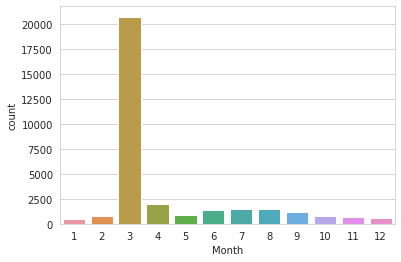

In [217]:
# Chart - 2 visualization code
sns.countplot(data=df1,x='Month')

##### 1. Why did you pick the specific chart?

To know which month was most active.

##### 2. What is/are the insight(s) found from the chart?

1. March has the highest tweets since the covid cases were rising significantly.
2. The rise in June, July and August is because of the increasing cases due to new variant of coronavirus. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3-Sentiments

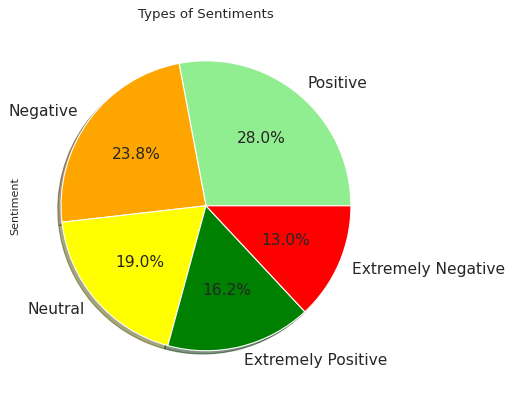

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


In [218]:
# Chart - 3 visualization code
# Plotting the pie chart for sentiment
plt.figure(figsize=(10,7), dpi=80)
df1['Sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors = ['lightgreen','orange', 'yellow','green','red'],startangle=360,fontsize=14,shadow=True)
plt.title("Types of Sentiments")
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()
#Table
s = df['Sentiment'].value_counts().reset_index()
s.columns = ['Sentiment','count']
s

##### 1. Why did you pick the specific chart?

To know the percentage of each type of sentiment

##### 2. What is/are the insight(s) found from the chart?

1. Positive has the highest percentage i.e 28%.
2. Negative has around 24%
3. Neutral has 19%.
4. Extremely positive has 16.2%.
5. Extremely negative has 13%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4-Tweet At

<Axes: xlabel='TweetAt'>

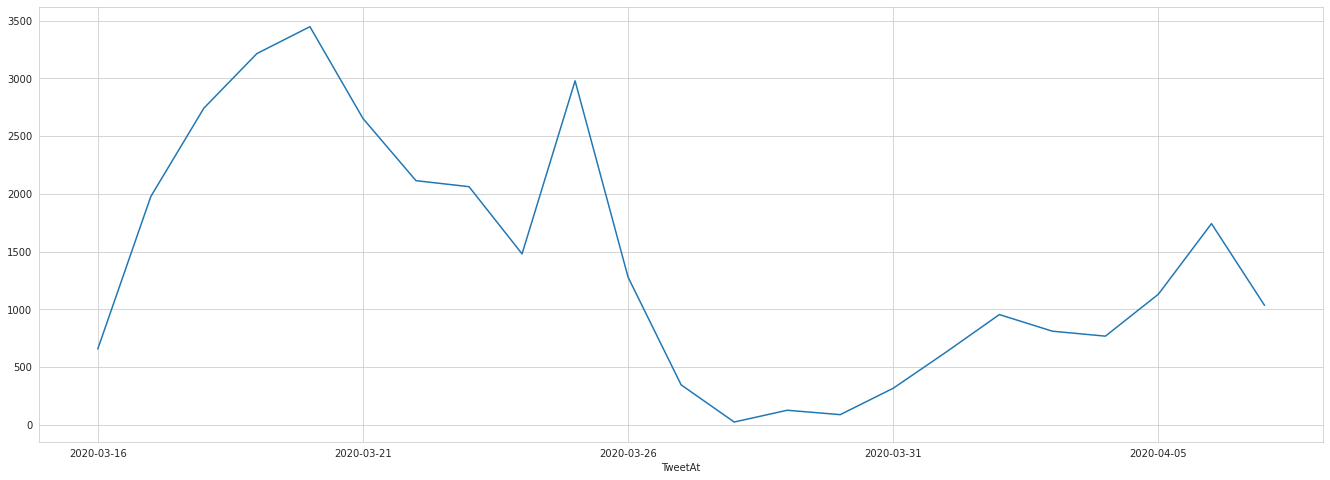

In [219]:
# Chart - 4 visualization code
df1['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d-%m-%Y')
df1['TweetAt'] = df1['TweetAt'].dt.strftime('%Y-%m-%d')
plt.figure(figsize=(23,8))
d=df1.groupby('TweetAt').count().sort_values(by='TweetAt')['OriginalTweet']
#d.sort_values(by='TweetAt')
d.plot()

##### 1. Why did you pick the specific chart?

To know which day has the most number of tweets.

##### 2. What is/are the insight(s) found from the chart?

1. Tweet started rising from 16/03/2020.
2. Number of Tweets were highest during 19/03/2020 to 20/03/2020.
3. After 25/03/2020 tweets dropped drastically.
4. On 28/03/2020 tweets were the least.
5. After 31/03/2020 tweets started to rose again.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Advertisement during the peak tweets can help in generating revenues for the companies.
2. During the days when tweets were the least it'll affect the Advertising companies.

#### Chart - 5-OriginalTweet

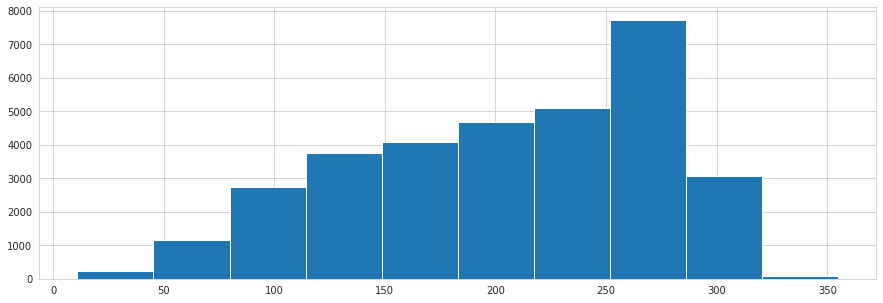

In [220]:
# Chart - 5 visualization code
plt.figure(figsize=(15,5))
plt.hist(df1['OriginalTweet'].str.len())
plt.show()

##### 1. Why did you pick the specific chart?

To know under which category of length majority of the tweets falls under.

##### 2. What is/are the insight(s) found from the chart?

1. Number of Tweets under 50 characters are around 200.
2. Majority of the tweets falls under the length of 250-280 characters.
3. Around 3000 tweets have length between 280-320.
4. Number of Tweets with character length more than 320 is approximately 100.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 6-Sentiments Revised

In [221]:
# Chart - 6 visualization code
df1['Sentiment']=df1['Sentiment'].replace(to_replace=["Extremely Positive", "Extremely Negative"],value=["Positive","Negative"])

<Axes: xlabel='Sentiment', ylabel='count'>

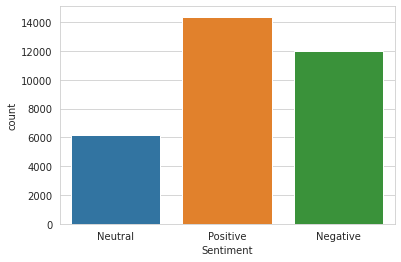

In [222]:
sns.countplot(data=df1,x='Sentiment')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7-WordCloud

In [223]:
# Chart - 7 visualization code
dfp=df1[df1['Sentiment']=='Positive']
dfn=df1[df1['Sentiment']=='Negative']
dfnt=df1[df1['Sentiment']=='Neutral']

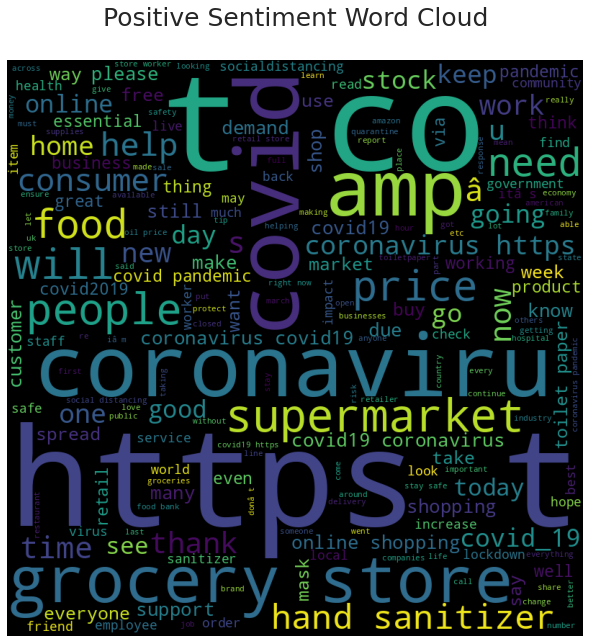

In [224]:
#Word Cloud for positive sentiments
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in dfp.OriginalTweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
  # plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Positive Sentiment Word Cloud\n',fontsize=25)
plt.show()

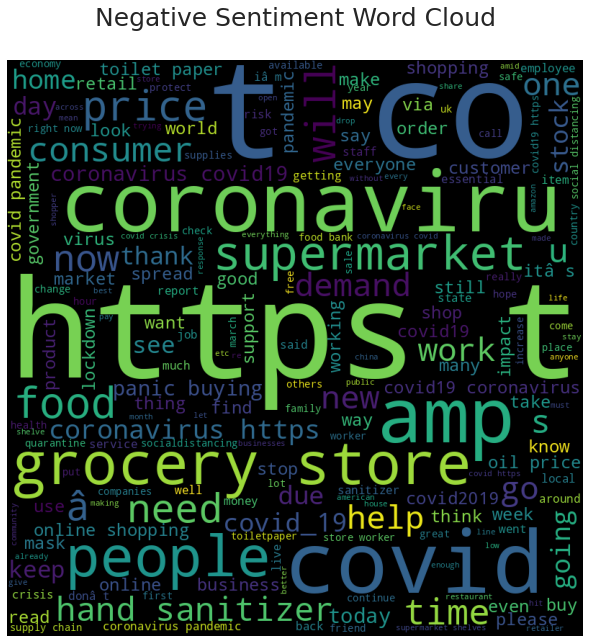

In [225]:
# Word count for negative sentiment
for val in dfn.OriginalTweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Negative Sentiment Word Cloud\n',fontsize=25)
plt.show()

##### 1. Why did you pick the specific chart?

To know which of the words are prominent.

##### 2. What is/are the insight(s) found from the chart?

Words that are more prominent are:

1. Covid
2. Coronavirus
3. Supermarket
4. Grocery
5. Sanitizer
6. Food and etc. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insight from this is extremely beneficial for the business.
1. Demand of hand sanitizer and mask shoots up very high causing  skewflation.Ecommerce business increased drastically.People prefered buying online rather than going to the stores.
2. Offline business affected terribly as the sales went down because less customer preferred going out to buy.


#### Chart - 8

In [226]:
# Chart - 8 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [227]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [228]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [229]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [230]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [231]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

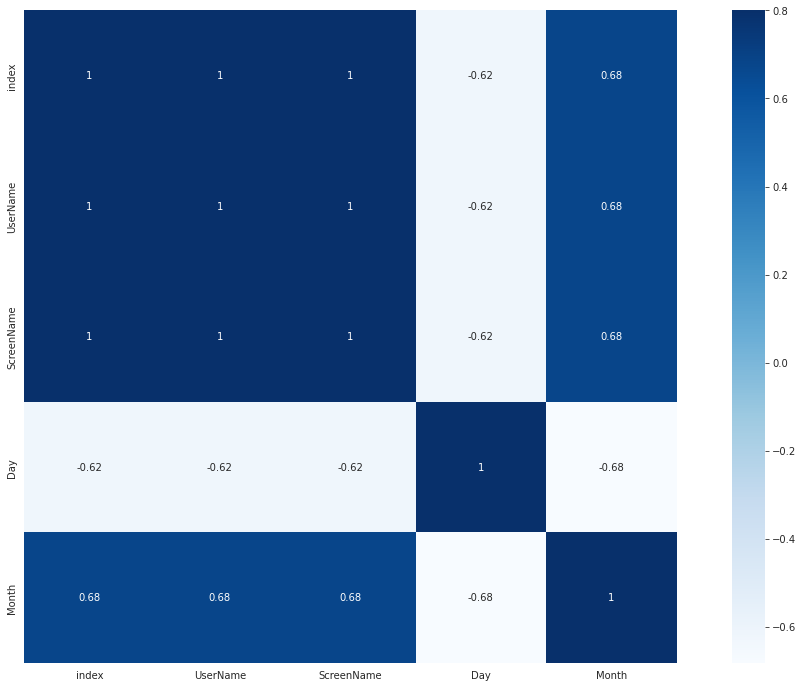

In [232]:
# Correlation Heatmap visualization code
#correlation matrix
corrmat = df1.corr()
h, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=.8, square=True , cmap="Blues",annot=True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [233]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [234]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [235]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [236]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [237]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [238]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [239]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [311]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [312]:
# Expand Contraction
import contractions
def cont(x):
  return contractions.fix(x)

In [313]:
df1['Mod_Tweet']=df1['OriginalTweet'].apply(cont)

#### 2. Lower Casing

In [314]:
# Lower Casing
df1['Mod_Tweet']=df1["Mod_Tweet"].str.lower()

#### 3. Removing URLs & Removing words and digits contain digits.

In [315]:
# Remove URLs & Remove words and digits contain digits
import re

def remove_url(text_data):
  text=re.sub(r"http\S+", "", text_data)
  return remove_numbers(text)
# function to remove numbers
def remove_numbers(text):
  # define the pattern to keep
  pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
  return re.sub(pattern, '', text)

In [316]:
df1['Mod_Tweet']=df1['Mod_Tweet'].apply(remove_url)

#### 4. Removing Punctuations

In [317]:
# Remove Punctuations
import string
string.punctuation
punct_list = list(string.punctuation)
def remove_punctuation(text):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    #return remove_special_characters(text)
    return remove_special_characters(text.strip())
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\']' 
    return re.sub(pat, ' ', text)

In [318]:
df1['Mod_Tweet']=df1['Mod_Tweet'].apply(remove_punctuation)

In [319]:
df1['Backup']=df1['Mod_Tweet'].copy()

#### 5. Removing Stopwords & Removing White spaces

In [320]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [321]:
# Remove Stopwords and White spaces
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    #White space in joined with the string so there is not need to check for extra white spaces 
    return " ".join([word for word in str(text).split() if word not in stop_words]) 

In [322]:
df1['Mod_Tweet']=df1['Mod_Tweet'].apply(remove_stopwords)

In [323]:
# Remove White spaces
#The White spaces situation is taken care in the above function
#another function to check for white spaces
'''def remove_whitespaces(text):
  return re.sub(' +', ' ', text)'''

"def remove_whitespaces(text):\n  return re.sub(' +', ' ', text)"

#### 7. Tokenization

In [324]:
#Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def token(y):
  return word_tokenize(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [325]:
df1['Mod_Tweet']=df1['Mod_Tweet'].apply(token)

In [326]:
len(df1['Mod_Tweet'][0])

4

In [276]:
df1['Backup']=df1['Mod_Tweet'].copy()

#### 8. Text Normalization

In [277]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [281]:
df1['Mod_Tweet'][0]

['menyrbie', 'phil', 'gahan', 'chrisitv']

In [331]:
# Stemming
#function for stemming
def stemming(text): 
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [332]:
df1['Mod_Tweet']=df1['Mod_Tweet'].apply(stemming)

##### Which text normalization technique have you used and why?

Stemming is used here for normalization.Since we are providing data to the machine it doesn't need to understand the meaning of the word.It'll use the root word and based on the training it'll will gives us the sentiment related to it.Also since we are dealing with a large amount of data Stemming will be quicker.


#### 10. Text Vectorization

In [333]:
#TF/IDF Vectorization is used

##### Which text vectorization technique have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [336]:
X=df1.Mod_Tweet
y=df1.Sentiment
# Fit the Algorithm
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
tvec = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer',tvec),('classifier',LR)])
model1.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [337]:
## model prediction
y_pred = model1.predict(X_test)

In [338]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy :' ,accuracy_score(y_pred,y_test))
print('Precision :', precision_score(y_pred,y_test, average='weighted'))
print('Recall :', recall_score(y_pred,y_test, average='weighted'))

Accuracy : 0.7844642308873196
Precision : 0.7943701870532156
Recall : 0.7844642308873196


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***